In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [7]:
df=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\project\\pronostico_dataset.csv",sep=";")

In [8]:
df.drop(columns='ID',axis=1,inplace =True)

In [9]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [13]:
df.loc[df.prognosis=='retinopathy','prognosis']=1
df.loc[df.prognosis=='no_retinopathy','prognosis']=0

In [15]:
x=df.iloc[:,:-1]
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=df.iloc[:,-1]
y=y.astype(int)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [9]:
accuracy={}
recall={}
precision={}
f1={}
models={}

### Logistic Regression

#### Model Building

In [10]:
kfold=KFold(n_splits=10)
model=LogisticRegression()
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,lr.predict(x_test)))
print(metrics.recall_score(y_test,lr.predict(x_test)))
print(metrics.classification_report(y_test,lr.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,lr.predict(x_test)))
accuracy['lr']=metrics.accuracy_score(y_test,lr.predict(x_test))
recall['lr']=metrics.recall_score(y_test,lr.predict(x_test))
f1['lr']=metrics.f1_score(y_test,lr.predict(x_test))
precision['lr']=metrics.precision_score(y_test,lr.predict(x_test))
models['lr']=lr

0.7608333333333334
0.7805280528052805
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       594
           1       0.75      0.78      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200

confusion matrix:

 [[440 154]
 [133 473]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

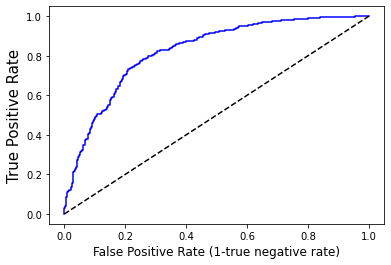

In [34]:
auc=metrics.roc_auc_score(y_test,.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [20]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### decision trees

#### Hyper-parameter tuning

In [21]:

param_grid = [{'max_depth':[1,2,3,4,5]}]
dt=DecisionTreeClassifier(criterion='gini')
gsdt = GridSearchCV(dt,param_grid,scoring='recall',cv=kfold)
gsdt.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5]}], scoring='recall')

In [23]:
gsdt.best_params_ , gsdt.best_score_

({'max_depth': 2}, 0.7874816729310963)

#### Model Building

In [37]:
models['Decision Tree']=DecisionTreeClassifier(max_depth=2,criterion='gini')
dt=DecisionTreeClassifier(max_depth=2,criterion='gini')
dt.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,dt.predict(x_test)))
print(metrics.recall_score(y_test,dt.predict(x_test)))
print(metrics.classification_report(y_test,dt.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,dt.predict(x_test)))
accuracy['dt']=metrics.accuracy_score(y_test,dt.predict(x_test))
recall['dt']=metrics.recall_score(y_test,dt.predict(x_test))
precision['dt']=metrics.precision_score(y_test,dt.predict(x_test))
f1['dt']=metrics.f1_score(y_test,dt.predict(x_test))
models['dt']=dt

0.7175
0.7937293729372937
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       594
           1       0.69      0.79      0.74       606

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200

confusion matrix:

 [[380 214]
 [125 481]]


#### roc curve

Text(0, 0.5, 'True Positive Rate')

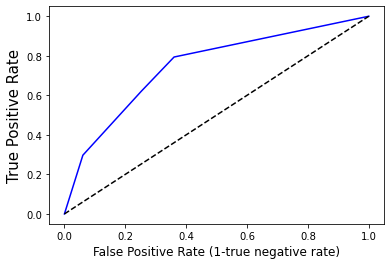

In [32]:
auc=metrics.roc_auc_score(y_test,dt.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,dt.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### KNN


#### Hyper-parameter tuning

In [37]:
k_range=range(1,100)
param_grid = [{'weights':['uniform','distance'],'n_neighbors':list(k_range)}]
knn=KNeighborsClassifier()
gsknn = GridSearchCV(knn,param_grid,scoring='recall',n_jobs=-1,cv=kfold)
gsknn.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'weights': ['uniform', 'distance']}],
             scoring='recall')

In [38]:
gsknn.best_params_ , gsknn.best_score_

({'n_neighbors': 34, 'weights': 'distance'}, 0.768337860286967)

#### Model Building

In [36]:
knn=KNeighborsClassifier(n_neighbors=34,weights='distance')
knn.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,knn.predict(x_test)))
print(metrics.recall_score(y_test,knn.predict(x_test)))
print(metrics.classification_report(y_test,knn.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,knn.predict(x_test)))
accuracy['knn']=metrics.accuracy_score(y_test,knn.predict(x_test))
recall['knn']=metrics.recall_score(y_test,knn.predict(x_test))
precision['knn']=metrics.precision_score(y_test,knn.predict(x_test))
f1['knn']=metrics.f1_score(y_test,knn.predict(x_test))
models['knn']=knn

0.7483333333333333
0.7937293729372937
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       594
           1       0.73      0.79      0.76       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

confusion matrix:

 [[417 177]
 [125 481]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

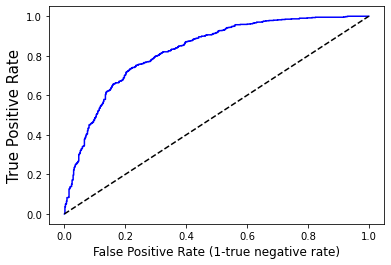

In [29]:
auc=metrics.roc_auc_score(y_test,knn.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,knn.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### Naive Bayes

#### Model Building

In [35]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,nb.predict(x_test)))
print(metrics.recall_score(y_test,nb.predict(x_test)))
print(metrics.classification_report(y_test,nb.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,nb.predict(x_test)))
accuracy['nb']=metrics.accuracy_score(y_test,nb.predict(x_test))
recall['nb']=metrics.recall_score(y_test,nb.predict(x_test))
precision['nb']=metrics.precision_score(y_test,nb.predict(x_test))
f1['nb']=metrics.f1_score(y_test,nb.predict(x_test))
models['nb']=nb

0.7533333333333333
0.7442244224422442
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       594
           1       0.76      0.74      0.75       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

confusion matrix:

 [[453 141]
 [155 451]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

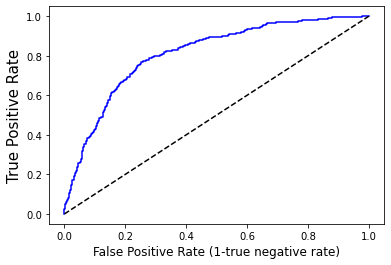

In [37]:
auc=metrics.roc_auc_score(y_test,nb.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,nb.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### SVM

#### Hyper-parameter tuning

In [50]:
svm = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(svm,param_grid,scoring='f1',n_jobs=-1,cv=kfold)
gsv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='f1')

In [51]:
gsv.best_params_ , gsv.best_score_

({'C': 11, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7613616025309737)

#### Model Building

In [22]:
model_SVM=SVC(kernel='rbf',gamma=0.01,C=0.01,probability=True)
model_SVM.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_SVM.predict(x_test)))
print(metrics.recall_score(y_test,model_SVM.predict(x_test)))
print(metrics.classification_report(y_test,model_SVM.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_SVM.predict(x_test)))
accuracy['SVM']=metrics.accuracy_score(y_test,model_SVM.predict(x_test))
recall['SVM']=metrics.recall_score(y_test,model_SVM.predict(x_test))
precision['SVM']=metrics.precision_score(y_test,model_SVM.predict(x_test))
f1['SVM']=metrics.f1_score(y_test,model_SVM.predict(x_test))
models['SVM']=model_SVM

0.745
0.8102310231023102
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       594
           1       0.72      0.81      0.76       606

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

confusion matrix:

 [[403 191]
 [115 491]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

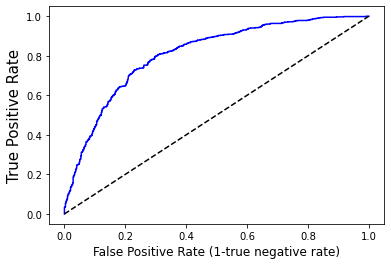

In [41]:
auc=metrics.roc_auc_score(y_test,model_SVM.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,model_SVM.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)


### AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

#### Hyper-parameter tuning

In [48]:
param_grid=[{'n_estimators':[200,400,600,800,1000]}]

In [49]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini'),random_state=7)
gsada=GridSearchCV(ada,param_grid,n_jobs=-1,scoring='recall',cv=kfold)
gsada.fit(x_train,y_train)
gsada.best_params_ , gsada.best_score_


({'n_estimators': 400}, 0.7304981433703521)

#### Model Building

In [24]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini'),random_state=7,n_estimators=400)
ada.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,ada.predict(x_test)))
print(metrics.recall_score(y_test,ada.predict(x_test)))
print(metrics.classification_report(y_test,ada.predict(x_test)))
print(metrics.confusion_matrix(y_test,ada.predict(x_test)))
accuracy['ada']=metrics.accuracy_score(y_test,ada.predict(x_test))
recall['ada']=metrics.recall_score(y_test,ada.predict(x_test))
precision['ada']=metrics.precision_score(y_test,ada.predict(x_test))
f1['ada']=metrics.f1_score(y_test,ada.predict(x_test))
models['ada']=ada

0.7433333333333333
0.7623762376237624
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       594
           1       0.74      0.76      0.75       606

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200

confusion matrix:

 [[430 164]
 [144 462]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

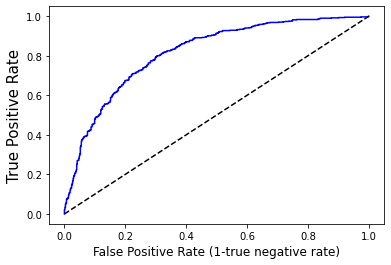

In [39]:
auc=metrics.roc_auc_score(y_test,ada.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,ada.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### Bagging

#### Hyper-parameter tuning

In [52]:
param_grid=[{'n_estimators':range(1,101),'max_samples':[0.2,0.4,0.6,0.8,1.0]}]
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,criterion='entropy'),random_state=7)
gsb = GridSearchCV(bagging,param_grid,scoring='f1',n_jobs=-1,cv=kfold)
gsb.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=3),
                                         random_state=7),
             n_jobs=-1,
             param_grid=[{'max_samples': [0.2, 0.4, 0.6, 0.8, 1.0],
                          'n_estimators': range(1, 101)}],
             scoring='f1')

In [53]:
gsb.best_params_ , gsb.best_score_

({'max_samples': 0.2, 'n_estimators': 17}, 0.7475700503216283)

#### Model Building

In [25]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,criterion='entropy'),n_estimators=17,max_samples=0.2,random_state=7)
bagging.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,bagging.predict(x_test)))
print(metrics.recall_score(y_test,bagging.predict(x_test)))
print(metrics.classification_report(y_test,bagging.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,bagging.predict(x_test)))
accuracy['bagging']=metrics.accuracy_score(y_test,bagging.predict(x_test))
recall['bagging']=metrics.recall_score(y_test,bagging.predict(x_test))
precision['bagging']=metrics.precision_score(y_test,bagging.predict(x_test))
f1['bagging']=metrics.f1_score(y_test,bagging.predict(x_test))
models['bagging']=bagging

0.7516666666666667
0.7722772277227723
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       594
           1       0.75      0.77      0.76       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

confusion matrix:

 [[434 160]
 [138 468]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

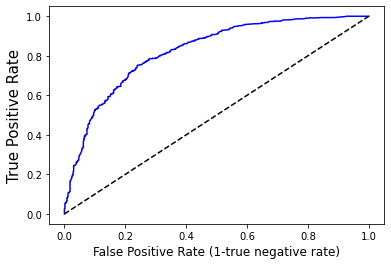

In [62]:
auc=metrics.roc_auc_score(y_test,bagging.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,bagging.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### Random Forest

#### Hyper-parameter tuning

In [95]:
param_grid=[{'n_estimators':range(64,125),'max_depth':[2,3,4,5]}]
rf = RandomForestClassifier(max_features=4,max_depth=3,criterion='gini',random_state=23)
gsrf = GridSearchCV(rf,param_grid,scoring='recall',n_jobs=-1,cv=kfold)
gsrf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=3, max_features=4,
                                              random_state=23),
             n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'n_estimators': range(64, 125)}],
             scoring='recall')

In [96]:
gsrf.best_params_ , gsrf.best_score_

({'max_depth': 2, 'n_estimators': 107}, 0.7891963966425528)

#### Model Building

In [99]:
model_rf = RandomForestClassifier(n_estimators=107,max_depth=2, max_features=4,criterion='gini',random_state=23)
model_rf.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_rf.predict(x_test)))
print(metrics.recall_score(y_test,model_rf.predict(x_test)))
print(metrics.classification_report(y_test,model_rf.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_rf.predict(x_test)))
accuracy['rf']=metrics.accuracy_score(y_test,model_rf.predict(x_test))
recall['rf']=metrics.recall_score(y_test,model_rf.predict(x_test))
precision['rf']=metrics.precision_score(y_test,model_rf.predict(x_test))
f1['rf']=metrics.f1_score(y_test,model_rf.predict(x_test))
models['rf']=model_rf

0.7408333333333333
0.8267326732673267
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       594
           1       0.71      0.83      0.76       606

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

confusion matrix:

 [[388 206]
 [105 501]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

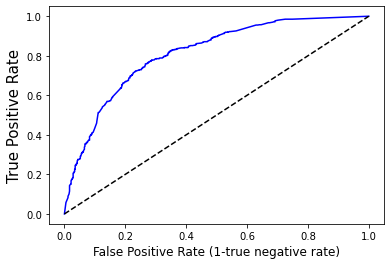

In [81]:
auc=metrics.roc_auc_score(y_test,model_rf.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,model_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### LGBM

In [27]:
import lightgbm as lgb

#### Hyper-parameter tuning

In [65]:

param_grid=[{'max_depth':[2,3,4,5]}]
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,random_state=42)
gslgb = GridSearchCV(model_lgb,param_grid,scoring='recall',n_jobs=-1,cv=kfold)
gslgb.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LGBMClassifier(learning_rate=0.09, random_state=42),
             n_jobs=-1, param_grid=[{'max_depth': [2, 3, 4, 5]}],
             scoring='recall')

In [67]:
gslgb.best_params_ , gslgb.best_score_

({'max_depth': 4}, 0.7722174355073113)

#### Model Building

In [28]:
lgbm=lgb.LGBMClassifier(learning_rate=0.09,random_state=42,max_depth=4)
lgbm.fit(x_train,y_train,eval_metric='recall')

LGBMClassifier(learning_rate=0.09, max_depth=4, random_state=42)

In [87]:
y_pred=lgbm.predict(x_test)

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,y_pred))
accuracy['lgbm']=metrics.accuracy_score(y_test,y_pred)
recall['lgbm']=metrics.recall_score(y_test,y_pred)
precision['lgbm']=metrics.precision_score(y_test,y_pred)
f1['lgbm']=metrics.f1_score(y_test,y_pred)
models['lgbm']=lgbm

0.7566666666666667
0.806930693069307
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       594
           1       0.74      0.81      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200

confusion matrix:

 [[419 175]
 [117 489]]


#### roc-curve

Text(0, 0.5, 'True Positive Rate')

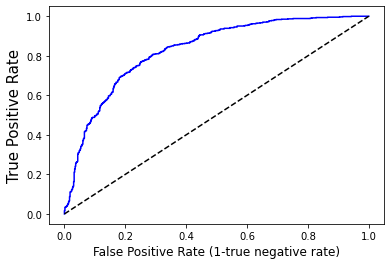

In [74]:
auc=metrics.roc_auc_score(y_test,lgbm.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,lgbm.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

### Neural Network

#### Hyper-parameter tuning

In [66]:
recal={}

for i in range(1,5):
    for j in range(1,i+1):
        model_nn=Sequential()
        model_nn.add(Dense(4,  activation='relu'))
        model_nn.add(Dense(i,  activation='relu'))
        model_nn.add(Dense(j,  activation='relu'))
        model_nn.add(Dense(1, activation='sigmoid'))
        model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_nn.fit(x_train, y_train, validation_split=0.33, epochs=250, batch_size=50)
        y_pred_nn=np.round(model_nn.predict(x_test))
        recal[metrics.recall_score(y_test,y_pred_nn)]=(i,j,metrics.accuracy_score(y_test,y_pred_nn))
        

Epoch 1/250
65/65 [==============================] - 2s 8ms/step - loss: 0.6931 - accuracy: 0.5126 - val_loss: 0.6929 - val_accuracy: 0.5180
Epoch 2/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5163 - val_loss: 0.6927 - val_accuracy: 0.5180
Epoch 3/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5163 - val_loss: 0.6927 - val_accuracy: 0.5180
Epoch 4/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 5/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 6/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 7/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 8/250
6

Epoch 59/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 60/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 61/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 62/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 63/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 64/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 65/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 

65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 174/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 175/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 176/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 177/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 178/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 179/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 180/250

65/65 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7496 - val_loss: 0.5207 - val_accuracy: 0.7420
Epoch 38/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5184 - accuracy: 0.7496 - val_loss: 0.5198 - val_accuracy: 0.7407
Epoch 39/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7521 - val_loss: 0.5189 - val_accuracy: 0.7401
Epoch 40/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7474 - val_loss: 0.5183 - val_accuracy: 0.7413
Epoch 41/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5167 - accuracy: 0.7505 - val_loss: 0.5177 - val_accuracy: 0.7407
Epoch 42/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.7490 - val_loss: 0.5174 - val_accuracy: 0.7413
Epoch 43/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5153 - accuracy: 0.7499 - val_loss: 0.5170 - val_accuracy: 0.7394
Epoch 44/250
65/65 

Epoch 95/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7490 - val_loss: 0.5077 - val_accuracy: 0.7407
Epoch 96/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5055 - accuracy: 0.7481 - val_loss: 0.5078 - val_accuracy: 0.7413
Epoch 97/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7487 - val_loss: 0.5078 - val_accuracy: 0.7445
Epoch 98/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7468 - val_loss: 0.5076 - val_accuracy: 0.7413
Epoch 99/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.7487 - val_loss: 0.5075 - val_accuracy: 0.7401
Epoch 100/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7477 - val_loss: 0.5075 - val_accuracy: 0.7401
Epoch 101/250
65/65 [==============================] - 0s 5ms/step - loss: 0.5054 - accuracy: 0.7471 - val_loss: 0.5076 - val_accuracy: 0.7350
Epoc

65/65 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7496 - val_loss: 0.5076 - val_accuracy: 0.7331
Epoch 210/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.7484 - val_loss: 0.5077 - val_accuracy: 0.7331
Epoch 211/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7493 - val_loss: 0.5078 - val_accuracy: 0.7331
Epoch 212/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7468 - val_loss: 0.5079 - val_accuracy: 0.7306
Epoch 213/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7493 - val_loss: 0.5079 - val_accuracy: 0.7325
Epoch 214/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7477 - val_loss: 0.5076 - val_accuracy: 0.7325
Epoch 215/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7474 - val_loss: 0.5077 - val_accuracy: 0.7331
Epoch 216/250

Epoch 74/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7546 - val_loss: 0.5107 - val_accuracy: 0.7413
Epoch 75/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.7509 - val_loss: 0.5102 - val_accuracy: 0.7407
Epoch 76/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7512 - val_loss: 0.5102 - val_accuracy: 0.7401
Epoch 77/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7524 - val_loss: 0.5103 - val_accuracy: 0.7413
Epoch 78/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7518 - val_loss: 0.5103 - val_accuracy: 0.7420
Epoch 79/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.7515 - val_loss: 0.5101 - val_accuracy: 0.7413
Epoch 80/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7518 - val_loss: 0.5100 - val_accuracy: 0.7407
Epoch 

65/65 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7549 - val_loss: 0.5083 - val_accuracy: 0.7432
Epoch 189/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7490 - val_loss: 0.5080 - val_accuracy: 0.7438
Epoch 190/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7524 - val_loss: 0.5080 - val_accuracy: 0.7432
Epoch 191/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5055 - accuracy: 0.7533 - val_loss: 0.5084 - val_accuracy: 0.7426
Epoch 192/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7537 - val_loss: 0.5084 - val_accuracy: 0.7426
Epoch 193/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7530 - val_loss: 0.5079 - val_accuracy: 0.7438
Epoch 194/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7552 - val_loss: 0.5080 - val_accuracy: 0.7426
Epoch 195/250

65/65 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7499 - val_loss: 0.5236 - val_accuracy: 0.7344
Epoch 53/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7496 - val_loss: 0.5234 - val_accuracy: 0.7369
Epoch 54/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.7512 - val_loss: 0.5230 - val_accuracy: 0.7356
Epoch 55/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7499 - val_loss: 0.5227 - val_accuracy: 0.7356
Epoch 56/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5167 - accuracy: 0.7509 - val_loss: 0.5223 - val_accuracy: 0.7369
Epoch 57/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5167 - accuracy: 0.7505 - val_loss: 0.5220 - val_accuracy: 0.7350
Epoch 58/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.7496 - val_loss: 0.5220 - val_accuracy: 0.7369
Epoch 59/250
65/65 

Epoch 110/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7537 - val_loss: 0.5169 - val_accuracy: 0.7338
Epoch 111/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7530 - val_loss: 0.5169 - val_accuracy: 0.7344
Epoch 112/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7540 - val_loss: 0.5165 - val_accuracy: 0.7306
Epoch 113/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7533 - val_loss: 0.5167 - val_accuracy: 0.7306
Epoch 114/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.7533 - val_loss: 0.5170 - val_accuracy: 0.7344
Epoch 115/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7530 - val_loss: 0.5163 - val_accuracy: 0.7293
Epoch 116/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7543 - val_loss: 0.5164 - val_accuracy: 0.7300

65/65 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7543 - val_loss: 0.5154 - val_accuracy: 0.7300
Epoch 225/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7527 - val_loss: 0.5155 - val_accuracy: 0.7300
Epoch 226/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7543 - val_loss: 0.5157 - val_accuracy: 0.7306
Epoch 227/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.7524 - val_loss: 0.5159 - val_accuracy: 0.7312
Epoch 228/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7546 - val_loss: 0.5159 - val_accuracy: 0.7293
Epoch 229/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.7543 - val_loss: 0.5156 - val_accuracy: 0.7319
Epoch 230/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7537 - val_loss: 0.5156 - val_accuracy: 0.7293
Epoch 231/250

Epoch 89/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7505 - val_loss: 0.5128 - val_accuracy: 0.7401
Epoch 90/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7490 - val_loss: 0.5128 - val_accuracy: 0.7407
Epoch 91/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7484 - val_loss: 0.5124 - val_accuracy: 0.7426
Epoch 92/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7493 - val_loss: 0.5126 - val_accuracy: 0.7420
Epoch 93/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5090 - accuracy: 0.7499 - val_loss: 0.5124 - val_accuracy: 0.7407
Epoch 94/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.7502 - val_loss: 0.5122 - val_accuracy: 0.7407
Epoch 95/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.7496 - val_loss: 0.5121 - val_accuracy: 0.7413
Epoch 

65/65 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7462 - val_loss: 0.5101 - val_accuracy: 0.7407
Epoch 204/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7496 - val_loss: 0.5100 - val_accuracy: 0.7420
Epoch 205/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7490 - val_loss: 0.5100 - val_accuracy: 0.7420
Epoch 206/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7499 - val_loss: 0.5099 - val_accuracy: 0.7401
Epoch 207/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7493 - val_loss: 0.5100 - val_accuracy: 0.7420
Epoch 208/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7487 - val_loss: 0.5098 - val_accuracy: 0.7394
Epoch 209/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7484 - val_loss: 0.5101 - val_accuracy: 0.7407
Epoch 210/250

Epoch 68/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7512 - val_loss: 0.5074 - val_accuracy: 0.7426
Epoch 69/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7484 - val_loss: 0.5077 - val_accuracy: 0.7457
Epoch 70/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5018 - accuracy: 0.7502 - val_loss: 0.5074 - val_accuracy: 0.7426
Epoch 71/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7499 - val_loss: 0.5076 - val_accuracy: 0.7451
Epoch 72/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7502 - val_loss: 0.5073 - val_accuracy: 0.7432
Epoch 73/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7496 - val_loss: 0.5072 - val_accuracy: 0.7407
Epoch 74/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7512 - val_loss: 0.5075 - val_accuracy: 0.7445
Epoch 

65/65 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.7515 - val_loss: 0.5082 - val_accuracy: 0.7432
Epoch 183/250
65/65 [==============================] - 0s 4ms/step - loss: 0.4988 - accuracy: 0.7490 - val_loss: 0.5080 - val_accuracy: 0.7451
Epoch 184/250
65/65 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.7490 - val_loss: 0.5083 - val_accuracy: 0.7464
Epoch 185/250
65/65 [==============================] - 0s 4ms/step - loss: 0.4984 - accuracy: 0.7502 - val_loss: 0.5077 - val_accuracy: 0.7445
Epoch 186/250
65/65 [==============================] - 0s 4ms/step - loss: 0.4986 - accuracy: 0.7533 - val_loss: 0.5082 - val_accuracy: 0.7451
Epoch 187/250
65/65 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.7505 - val_loss: 0.5079 - val_accuracy: 0.7457
Epoch 188/250
65/65 [==============================] - 0s 4ms/step - loss: 0.4982 - accuracy: 0.7502 - val_loss: 0.5085 - val_accuracy: 0.7464
Epoch 189/250

65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 47/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 48/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 49/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 50/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 51/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 52/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 53/250
65/65 

Epoch 104/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 105/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 106/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 107/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 108/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 109/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 110/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180

65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 219/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 220/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 221/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 222/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 223/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 224/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 225/250

Epoch 83/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.7490 - val_loss: 0.5116 - val_accuracy: 0.7388
Epoch 84/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5084 - accuracy: 0.7499 - val_loss: 0.5115 - val_accuracy: 0.7369
Epoch 85/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7484 - val_loss: 0.5117 - val_accuracy: 0.7420
Epoch 86/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7509 - val_loss: 0.5113 - val_accuracy: 0.7388
Epoch 87/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7496 - val_loss: 0.5114 - val_accuracy: 0.7363
Epoch 88/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7512 - val_loss: 0.5110 - val_accuracy: 0.7388
Epoch 89/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5078 - accuracy: 0.7496 - val_loss: 0.5112 - val_accuracy: 0.7363
Epoch 

65/65 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7512 - val_loss: 0.5101 - val_accuracy: 0.7394
Epoch 198/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7530 - val_loss: 0.5102 - val_accuracy: 0.7394
Epoch 199/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7509 - val_loss: 0.5096 - val_accuracy: 0.7394
Epoch 200/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7502 - val_loss: 0.5105 - val_accuracy: 0.7388
Epoch 201/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7515 - val_loss: 0.5097 - val_accuracy: 0.7401
Epoch 202/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7512 - val_loss: 0.5098 - val_accuracy: 0.7401
Epoch 203/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7490 - val_loss: 0.5108 - val_accuracy: 0.7420
Epoch 204/250

65/65 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5154 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 5/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 6/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 7/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 8/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 9/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 10/250
65/65 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 11/250
65/65 [====

Epoch 62/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 63/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 64/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 65/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 66/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 67/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 68/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 

65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 177/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 178/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 179/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 180/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 181/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 182/250
65/65 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 183/250

65/65 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.7521 - val_loss: 0.5277 - val_accuracy: 0.7363
Epoch 41/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.7515 - val_loss: 0.5267 - val_accuracy: 0.7338
Epoch 42/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7540 - val_loss: 0.5262 - val_accuracy: 0.7356
Epoch 43/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7499 - val_loss: 0.5258 - val_accuracy: 0.7344
Epoch 44/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.7533 - val_loss: 0.5261 - val_accuracy: 0.7363
Epoch 45/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.7505 - val_loss: 0.5251 - val_accuracy: 0.7350
Epoch 46/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.7499 - val_loss: 0.5247 - val_accuracy: 0.7338
Epoch 47/250
65/65 

Epoch 98/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.7527 - val_loss: 0.5183 - val_accuracy: 0.7281
Epoch 99/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7524 - val_loss: 0.5183 - val_accuracy: 0.7287
Epoch 100/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7499 - val_loss: 0.5181 - val_accuracy: 0.7287
Epoch 101/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5097 - accuracy: 0.7524 - val_loss: 0.5183 - val_accuracy: 0.7293
Epoch 102/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7505 - val_loss: 0.5180 - val_accuracy: 0.7281
Epoch 103/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7515 - val_loss: 0.5178 - val_accuracy: 0.7312
Epoch 104/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7496 - val_loss: 0.5181 - val_accuracy: 0.7312
E

65/65 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7533 - val_loss: 0.5156 - val_accuracy: 0.7356
Epoch 213/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7565 - val_loss: 0.5151 - val_accuracy: 0.7363
Epoch 214/250
65/65 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7537 - val_loss: 0.5150 - val_accuracy: 0.7331
Epoch 215/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7546 - val_loss: 0.5155 - val_accuracy: 0.7325
Epoch 216/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7583 - val_loss: 0.5160 - val_accuracy: 0.7338
Epoch 217/250
65/65 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7568 - val_loss: 0.5150 - val_accuracy: 0.7338
Epoch 218/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7577 - val_loss: 0.5157 - val_accuracy: 0.7331
Epoch 219/250

In [67]:
recal

{1.0: (4, 3, 0.505),
 0.806930693069307: (4, 2, 0.7625),
 0.7904290429042904: (2, 2, 0.7616666666666667),
 0.7970297029702971: (3, 1, 0.7458333333333333),
 0.7937293729372937: (3, 2, 0.7658333333333334),
 0.8102310231023102: (3, 3, 0.7541666666666667),
 0.7986798679867987: (4, 4, 0.755)}

#### Model building

In [81]:
model_nn=Sequential()
model_nn.add(Dense(4,  activation='relu'))
model_nn.add(Dense(3,  activation='relu'))
model_nn.add(Dense(3,  activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(x_train, y_train, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
65/65 [==============================] - 1s 5ms/step - loss: 0.6864 - accuracy: 0.5281 - val_loss: 0.6613 - val_accuracy: 0.5798
Epoch 2/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6128 - val_loss: 0.6286 - val_accuracy: 0.6524
Epoch 3/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.6759 - val_loss: 0.6023 - val_accuracy: 0.7028
Epoch 4/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.7207 - val_loss: 0.5881 - val_accuracy: 0.7268
Epoch 5/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7372 - val_loss: 0.5804 - val_accuracy: 0.7281
Epoch 6/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7409 - val_loss: 0.5753 - val_accuracy: 0.7274
Epoch 7/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7369 - val_loss: 0.5707 - val_accuracy: 0.7293
Epoch 8/250
6

Epoch 59/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7496 - val_loss: 0.5191 - val_accuracy: 0.7394
Epoch 60/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7505 - val_loss: 0.5189 - val_accuracy: 0.7394
Epoch 61/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7505 - val_loss: 0.5187 - val_accuracy: 0.7388
Epoch 62/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7512 - val_loss: 0.5187 - val_accuracy: 0.7445
Epoch 63/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7474 - val_loss: 0.5184 - val_accuracy: 0.7413
Epoch 64/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7505 - val_loss: 0.5182 - val_accuracy: 0.7451
Epoch 65/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7509 - val_loss: 0.5178 - val_accuracy: 0.7382
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7505 - val_loss: 0.5115 - val_accuracy: 0.7388
Epoch 174/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7496 - val_loss: 0.5115 - val_accuracy: 0.7388
Epoch 175/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7515 - val_loss: 0.5115 - val_accuracy: 0.7413
Epoch 176/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7518 - val_loss: 0.5121 - val_accuracy: 0.7369
Epoch 177/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7533 - val_loss: 0.5117 - val_accuracy: 0.7401
Epoch 178/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7515 - val_loss: 0.5117 - val_accuracy: 0.7401
Epoch 179/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7496 - val_loss: 0.5118 - val_accuracy: 0.7375
Epoch 180/250

In [82]:
y_pred_nn=np.round(model_nn.predict(x_test))

38/38 [==============================] - 0s 1ms/step


In [83]:
print(metrics.accuracy_score(y_test,y_pred_nn))
print(metrics.recall_score(y_test,y_pred_nn))
print(metrics.classification_report(y_test,y_pred_nn))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,y_pred_nn))
accuracy['nn']=metrics.accuracy_score(y_test,y_pred_nn)
recall['nn']=metrics.recall_score(y_test,y_pred_nn)
precision['nn']=metrics.precision_score(y_test,y_pred_nn)
f1['nn']=metrics.f1_score(y_test,y_pred_nn)
models['nn']=model_nn

0.7566666666666667
0.7920792079207921
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       594
           1       0.74      0.79      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200

confusion matrix:

 [[428 166]
 [126 480]]


#### roc-curve

38/38 [==============================] - 0s 951us/step


Text(0, 0.5, 'True Positive Rate')

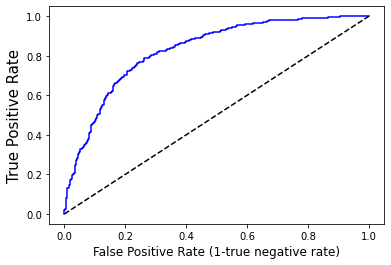

In [86]:
auc=metrics.roc_auc_score(y_test,y_pred_nn)
fpr,tpr,threshold=metrics.roc_curve(y_test,model_nn.predict(x_test).ravel())
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

## Results

In [100]:
model_name=pd.Series(['logistic regression','Decision Tree','KNN','Naive Bayes','SVM','adaboost','random forest','bagging','LGBM','NeuralNetwork'])
acc=[accuracy['lr'],accuracy['dt'],accuracy['knn'],accuracy['nb'],accuracy['SVM'],accuracy['ada'],accuracy['rf'],accuracy['bagging'],accuracy['lgbm'],accuracy['nn']]
rec=[recall['lr'],recall['dt'],recall['knn'],recall['nb'],recall['SVM'],recall['ada'],recall['rf'],recall['bagging'],recall['lgbm'],recall['nn']]
pre=[precision['lr'],precision['dt'],precision['knn'],precision['nb'],precision['SVM'],precision['ada'],precision['rf'],precision['bagging'],precision['lgbm'],precision['nn']]
f1score=[f1['lr'],f1['dt'],f1['knn'],f1['nb'],f1['SVM'],f1['ada'],f1['rf'],f1['bagging'],f1['lgbm'],f1['nn']]
model_result=pd.DataFrame({'model name':model_name,'accuracy':acc,'recall':rec,'precision':pre,'f1-score':f1score})

In [101]:
model_result

,model name,accuracy,recall,precision,f1-score
0,logistic regression,0.760833,0.780528,0.754386,0.767234
1,Decision Tree,0.717500,0.793729,0.692086,0.739431
2,KNN,0.748333,0.793729,0.731003,0.761076
3,Naive Bayes,0.753333,0.744224,0.761824,0.752922
4,SVM,0.745000,0.810231,0.719941,0.762422
5,adaboost,0.743333,0.762376,0.738019,0.750000
6,random forest,0.740833,0.826733,0.708628,0.763138
7,bagging,0.751667,0.772277,0.745223,0.758509
8,LGBM,0.756667,0.806931,0.736446,0.770079
9,NeuralNetwork,0.756667,0.792079,0.743034,0.766773


In [90]:
models

{'lr': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(max_depth=2),
 'dt': DecisionTreeClassifier(max_depth=2),
 'knn': KNeighborsClassifier(n_neighbors=34, weights='distance'),
 'nb': GaussianNB(),
 'SVM': SVC(C=0.01, gamma=0.01, probability=True),
 'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                    n_estimators=400, random_state=7),
 'bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3),
                   max_samples=0.2, n_estimators=17, random_state=7),
 'rf': RandomForestClassifier(max_depth=2, max_features=4, n_estimators=108),
 'lgbm': LGBMClassifier(learning_rate=0.09, max_depth=4, random_state=42),
 'nn': <keras.engine.sequential.Sequential at 0x19cf7043070>}

In [91]:
model_final=models['rf']